# Lending Club Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
cf.go_offline()
import plotly.express as px
sns.set_style('darkgrid')

import time
import re

# Get information about each feature

In [2]:
# Load the data frame that contains information about each feature.
data_info = pd.read_csv('DATA/lending_club_info.csv', index_col='LoanStatNew')

# Example: print a feature you are interested in knowing what it is exactly.
print(data_info.loc['revol_util']['Description'])

# Create a fucntion to print out the infomation about some feature you are interested in.
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

# Call the fucntion to get information about the feature
feat_info('mort_acc')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Number of mortgage accounts.


In [3]:
# # To display all the information about the features
# pd.set_option('display.max_colwidth', None)
# data_info

# Get the actual data you will use to make the prediction:

In [4]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [5]:
df.head(3)

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   

         emp_title emp_length home_ownership  annual_inc  ... open_acc  \
0        Marketing  10+ years           RENT    117000.0  ...     16.0   
1  Credit analyst     4 years       MORTGAGE     65000.0  ...     17.0   
2     Statistician   < 1 year           RENT     43057.0  ...     13.0   

  pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     0.0   36369.0       41.8      25.0                    w   
1     0.0   20131.0       53.3      27.0                    f   
2     0.0   11987.0       92.2      26.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   

                                           address  
0     0174 Michelle Gateway\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113  

[3 rows x 27 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
df.describe().T

count          mean           std     min       25%  \
loan_amnt             396030.0  14113.888089   8357.441341  500.00   8000.00   
int_rate              396030.0     13.639400      4.472157    5.32     10.49   
installment           396030.0    431.849698    250.727790   16.08    250.33   
annual_inc            396030.0  74203.175798  61637.621158    0.00  45000.00   
dti                   396030.0     17.379514     18.019092    0.00     11.28   
open_acc              396030.0     11.311153      5.137649    0.00      8.00   
pub_rec               396030.0      0.178191      0.530671    0.00      0.00   
revol_bal             396030.0  15844.539853  20591.836109    0.00   6025.00   
revol_util            395754.0     53.791749     24.452193    0.00     35.80   
total_acc             396030.0     25.414744     11.886991    2.00     17.00   
mort_acc              358235.0      1.813991      2.147930    0.00      0.00   
pub_rec_bankruptcies  395495.0      0.121648      0.356174    0.00      0.00   

                           50%       75%         max  
loan_amnt             12000.00  20000.00    40000.00  
int_rate                 13.33     16.49       30.99  
installment             375.43    567.30     1533.81  
annual_inc            64000.00  90000.00  8706582.00  
dti                      16.91     22.98     9999.00  
open_acc                 10.00     14.00       90.00  
pub_rec                   0.00      0.00       86.00  
revol_bal             11181.00  19620.00  1743266.00  
revol_util               54.80     72.90      892.30  
total_acc                24.00     32.00      151.00  
mort_acc                  1.00      3.00       34.00  
pub_rec_bankruptcies      0.00      0.00        8.00

In [8]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

<AxesSubplot:>

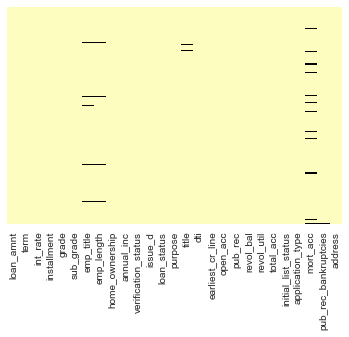

In [9]:
sns.heatmap(data=df.isnull(), yticklabels=False, cbar=False, cmap='magma_r')

As we can see, the labels are given as strings. Thus, we will have to replace them with dummy values. That is, 0 for Charged Off and 1 for Fully Paid

In [10]:
df = pd.get_dummies(data=df, columns=['loan_status'], drop_first=True)
df['fully_paid'] = df['loan_status_Fully Paid']
df.drop(['loan_status_Fully Paid'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

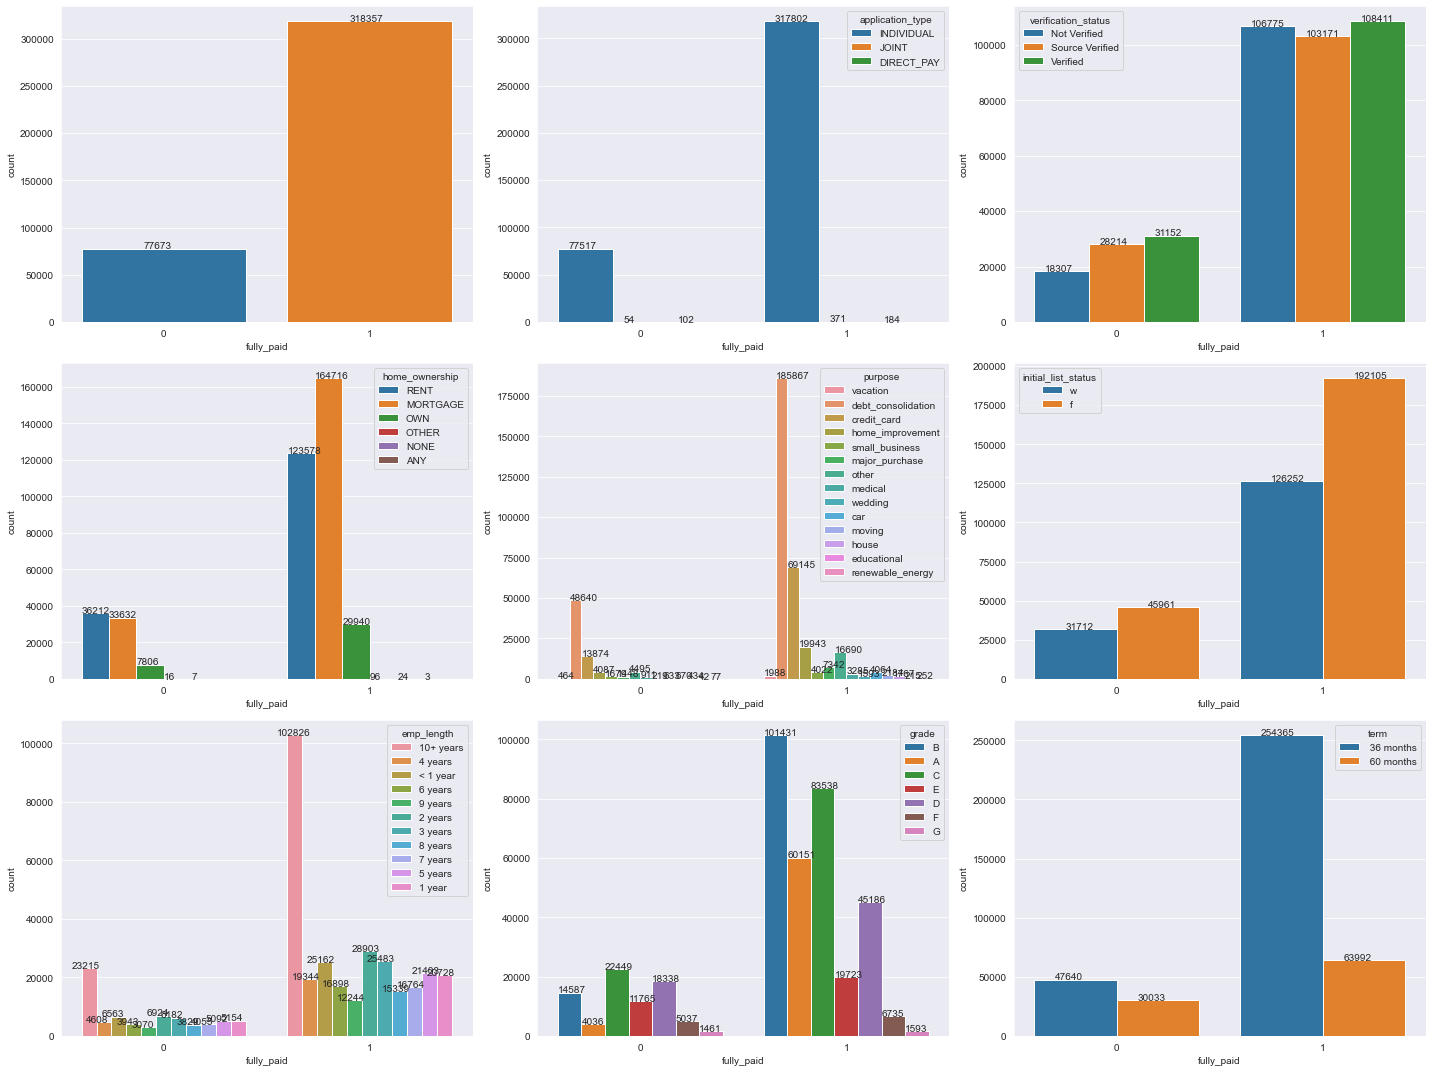

In [12]:
c = 3       # columns
r = 3       # rows
plt.figure(figsize=(20,15))

plt.subplot(r,c,1)
ax = sns.countplot(data=df, x='fully_paid',)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+15))

plt.subplot(r,c,2)
ax0 = sns.countplot(data=df, x='fully_paid', hue='application_type')
for p in ax0.patches:
        ax0.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+15))

plt.subplot(r,c,3)
ax1 = sns.countplot(data=df, x='fully_paid', hue='verification_status')
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+15))

plt.subplot(r,c,4)
ax2 = sns.countplot(data=df, x='fully_paid', hue='home_ownership')
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.0, p.get_height()+15))
        
plt.subplot(r,c,5)
ax3 = sns.countplot(data=df, x='fully_paid', hue='purpose')
for p in ax3.patches:
        ax3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.0, p.get_height()+15))
        
plt.subplot(r,c,6)
ax4 = sns.countplot(data=df, x='fully_paid', hue='initial_list_status')
for p in ax4.patches:
        ax4.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+15))
        
        
plt.subplot(r,c,7)
ax5 = sns.countplot(data=df, x='fully_paid', hue='emp_length')
for p in ax5.patches:
        ax5.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.05, p.get_height()+15))        
        
plt.subplot(r,c,8)
ax6 = sns.countplot(data=df, x='fully_paid', hue='grade')
for p in ax6.patches:
        ax6.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+15)) 
        
plt.subplot(r,c,9)
ax7 = sns.countplot(data=df, x='fully_paid', hue='term')
for p in ax7.patches:
        ax7.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+15))            
        
        
plt.tight_layout()
plt.show()

## Idea #1: Fully Paid and Categorical Data
<ol>
    <li> Most barower have returned the money. </li>
    <li> In both cases (paid or not), most <b>application_type</b>s are individual. </li>
    <li> With respect to <b>verification_status</b>, the number of those who didn't pay is less for the case of Not Verified. </li>
    <li> People who are renting or have mortgage on their homes, from <b>home_ownership</b> are more likely not to pay. <font color='blue'>To group these Categorical data without fragmentating the features we will group the points into the following groups; Own, which will include own and mortgage, and Rent, which will include everything else.</font> </li>
    <li> The most common <b>purpose</b> is debt consolidation for both. <font color='blue'>To group these Categorical data without fragmentating the features we will group the points into the following groups; dept_consolidation, credit_card, and other reasons.</font> </li>
    <li> The <b>initial_list_status</b> for both cases look similar. </li>
    <li> Most people who are taking loans have 10 years of <b>emp_length</b>. <font color='blue'>To group these Categorical data without fragmentating the features we will group the points into two groups; 10 years or more, and less than 10 years.</font> </li>
    <li> Most barowers who didn't pay are from <b>grade</b> C, while those who did pay are form grade B. <font color='blue'>To group these Categorical data without fragmentating the features we will group the points into the following groups; B, C, D, and others</font> </li>
    <li> Most loans have <b>term</b> of 36 months. </li>
</ol>

# Home Ownership Engineering

In [13]:
# This function groups the ownership status as we listed above.
def home_ownership_gruoping(data):
    # List of the groups we will have
    ho = ['Own', 'Rent']
    data['home_ownership'].replace(['OWN', 'MORTGAGE'], 'Own', inplace=True)
    data['home_ownership'].replace(['RENT','OTHER','NONE','ANY'], 'Rent', inplace=True)
    
    return data

In [14]:
# This function map the categorical data to a numral form that we can feed to our NN.
def home_ownership_eng(data):
    # Preparing the data to be mapped
    home_ownership_dict = {'Rent':0, 'Own':1}
    home_ownership_gruoping(data)
    
    # Maapping the data to numural form
    data['home_ownership_code'] = data.home_ownership.map(home_ownership_dict).astype('int')
    
    return data

In [15]:
home_ownership_eng(df);

# Purpose Engineering

If the NN won't perform well, consider regruping the data here to more groups.

In [16]:
def purpose_grouping(data):
    # List of the groups we will have
    p = ['debt_consolidation', 'credit_card', 'others']
    
    data['purpose'].replace(['home_improvement', 'other', 'major_purchase', 'small_business', 'car', 'medical', 'moving',
                           'vacation', 'house', 'wedding', 'renewable_energy', 'educational'], 'others', inplace=True)
    
    return data

In [17]:
def purpose_eng(data):
    # Preaparing the data to be mapped
    purpose_dict = {'debt_consolidation':0, 'credit_card':1, 'others':2}
    purpose_grouping(data)
    
    # Mapping the data
    data['purpose_code'] = data.purpose.map(purpose_dict).astype('int')
    
    return data

In [18]:
purpose_eng(df);

# Initial List Status Engineering

In [19]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [20]:
def initial_list_status_engineering(data):
    # Prepare the dictionary that you will use to map the data
    initial_list_status_dict = {'f':0, 'w':1}
    
    # Map the data
    data['initial_list_status_code'] = data.initial_list_status.map(initial_list_status_dict).astype('int')
    
    return data

In [21]:
initial_list_status_engineering(df);

# Earliest reported credit line was opened Engineering

In [22]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [23]:
# To convert earliest_cr_line to datetime formate
df['earliest_cr_line_'] = pd.to_datetime(df['earliest_cr_line'])

In [24]:
# Create new features; month and year
df['month'] = df['earliest_cr_line_'].dt.month
df['year'] = df['earliest_cr_line_'].dt.year

# Employment Length Engineering

Notice that we will have to impute the missing data since there are 18301 missing points for this. feature.

In [25]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [26]:
pd.set_option('display.max_columns', None)   # To display all the columns
df.head(2)

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   

         emp_title emp_length home_ownership  annual_inc verification_status  \
0        Marketing  10+ years           Rent    117000.0        Not Verified   
1  Credit analyst     4 years            Own     65000.0        Not Verified   

    issue_d             purpose               title    dti earliest_cr_line  \
0  Jan-2015              others            Vacation  26.24         Jun-1990   
1  Jan-2015  debt_consolidation  Debt consolidation  22.05         Jul-2004   

   open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0      16.0      0.0    36369.0        41.8       25.0                   w   
1      17.0      0.0    20131.0        53.3       27.0                   f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   

                                           address  fully_paid  \
0     0174 Michelle Gateway\nMendozaberg, OK 22690           1   
1  1076 Carney Fort Apt. 347\nLoganmouth, SD 05113           1   

   home_ownership_code  purpose_code  initial_list_status_code  \
0                    0             2                         1   
1                    1             0                         0   

  earliest_cr_line_  month  year  
0        1990-06-01      6  1990  
1        2004-07-01      7  2004

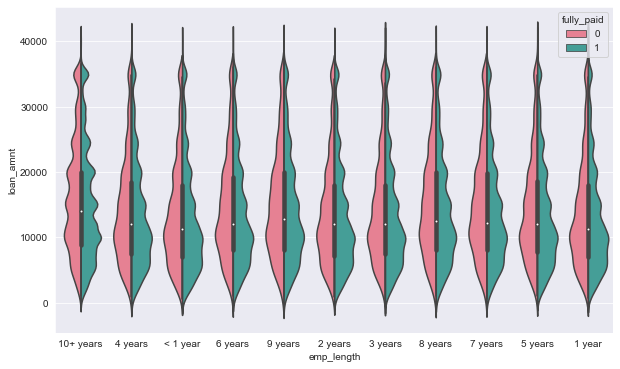

In [27]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='emp_length', y='loan_amnt', 
               hue='fully_paid', split=True, palette='husl')
plt.show()

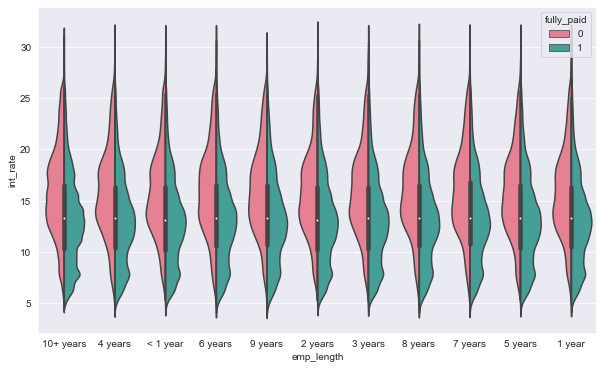

In [28]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='emp_length', y='int_rate', 
               hue='fully_paid', split=True, palette='husl')
plt.show()

In [29]:
df['earliest_cr_line'].max()

'Sep-2013'

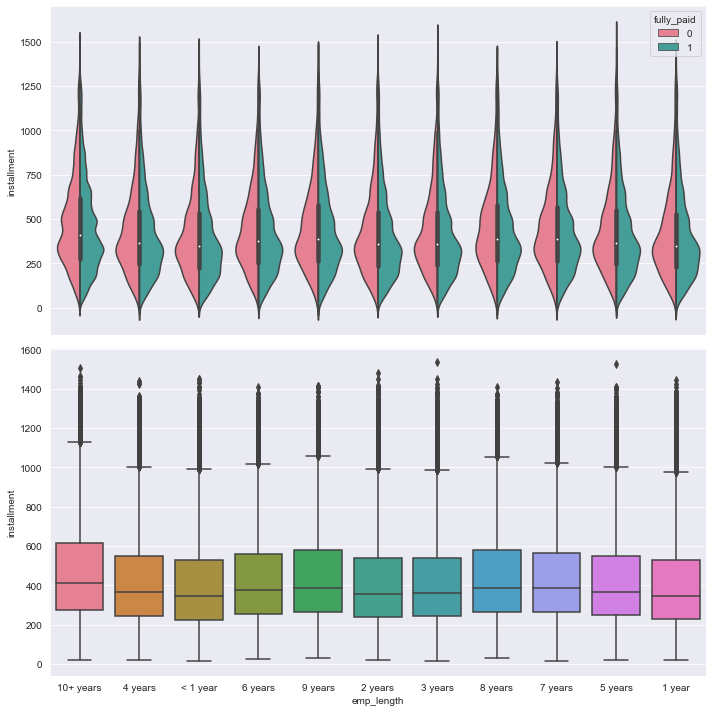

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

sns.violinplot(data=df, x='emp_length', y='installment', 
               hue='fully_paid', split=True, palette='husl').set(xlabel=None)   #.set(xticklabels=[])

plt.subplot(212)
sns.boxplot(data=df, x='emp_length', y='installment', palette='husl')

plt.tight_layout()
plt.show()

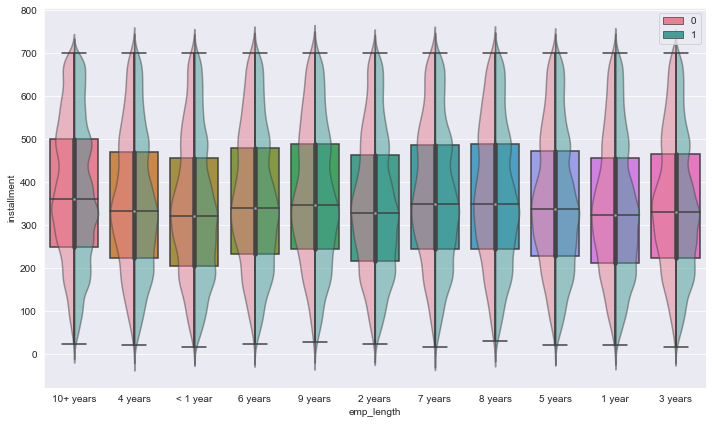

In [31]:
plt.figure(figsize=(10,6))

ax0 = sns.boxplot(data=df[df['installment']<700], x='emp_length', y='installment', palette='husl', )
ax1 = sns.violinplot(data=df[df['installment']<700], x='emp_length', y='installment', 
               hue='fully_paid', split=True, palette='husl',)

# Change the opacity
plt.setp(ax0.collections, alpha=.1)
plt.setp(ax1.collections, alpha=.5)

ax1.legend(loc=1)

plt.tight_layout()
plt.show()

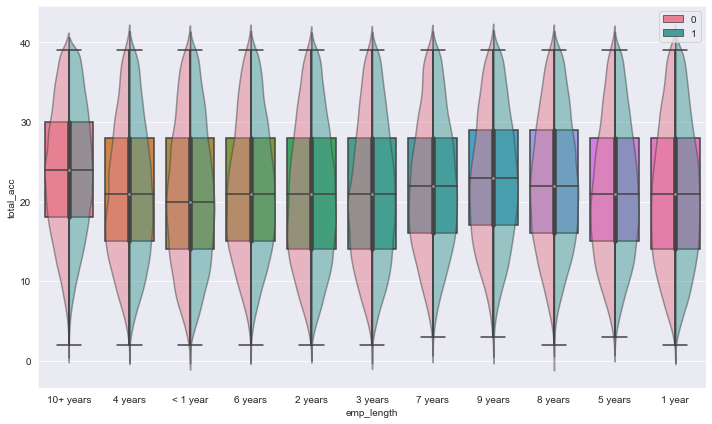

In [32]:
plt.figure(figsize=(10,6))

ax0 = sns.boxplot(data=df[df['total_acc']<40], x='emp_length', y='total_acc', palette='husl', )
ax1 = sns.violinplot(data=df[df['total_acc']<40], x='emp_length', y='total_acc', 
               hue='fully_paid', split=True, palette='husl',)

# Change the opacity
plt.setp(ax0.collections, alpha=.1)
plt.setp(ax1.collections, alpha=.5)

ax1.legend(loc=1)

plt.tight_layout()
plt.show()

In [33]:
# The following fucntion will group the data to impute it
def emp_length_grouping_imput(data):
    # List of groups we will have
    el = [0,1,2,3,4,5,6,7,8,9,10]
    
    # Group the data
    data['emp_length'].replace(['< 1 year'], 0, inplace=True)
    data['emp_length'].replace(['1 year'], 1, inplace=True)
    data['emp_length'].replace(['2 years'], 2, inplace=True)
    data['emp_length'].replace(['3 years'], 3, inplace=True)
    data['emp_length'].replace(['4 years'], 4, inplace=True)
    data['emp_length'].replace(['5 years'], 5, inplace=True)
    data['emp_length'].replace(['6 years'], 6, inplace=True)
    data['emp_length'].replace(['7 years'], 7, inplace=True)
    data['emp_length'].replace(['8 years'], 8, inplace=True)
    data['emp_length'].replace(['9 years'], 9, inplace=True)
    data['emp_length'].replace(['10+ years'], 10, inplace=True)
    
    return data

In [34]:
edf = emp_length_grouping_imput(df)

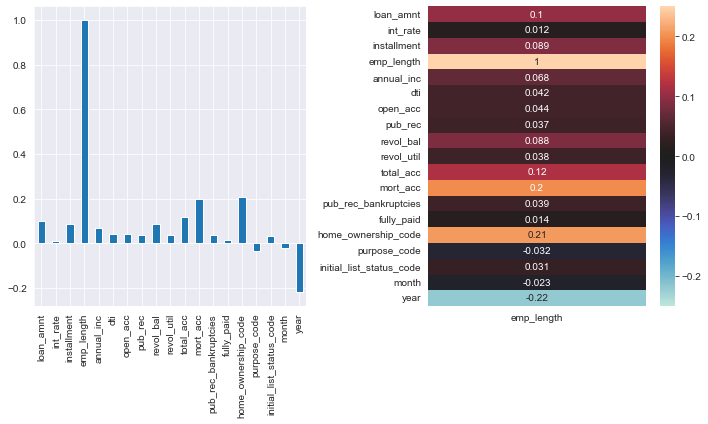

In [35]:
plt.figure(figsize=(10,6))
plt.subplot(121)
edf.corr()['emp_length'].plot(kind='bar')
plt.subplot(122)
sns.heatmap(data=pd.DataFrame(edf.corr()['emp_length']),
            annot=True, cmap='icefire', vmin=-0.25, vmax=0.25)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='emp_length', ylabel='count'>

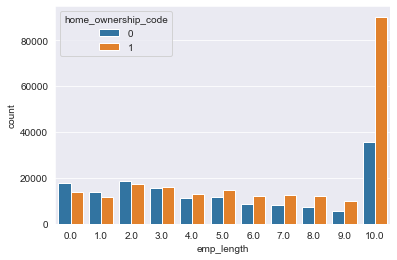

In [36]:
sns.countplot(data=df, x='emp_length', hue='home_ownership_code')

Based on the graph above, I will impute the missing data using the assumption that if home_ownership_code is 1, then 60% of the times it will be more than 10 years, and 40% less than 10 years.

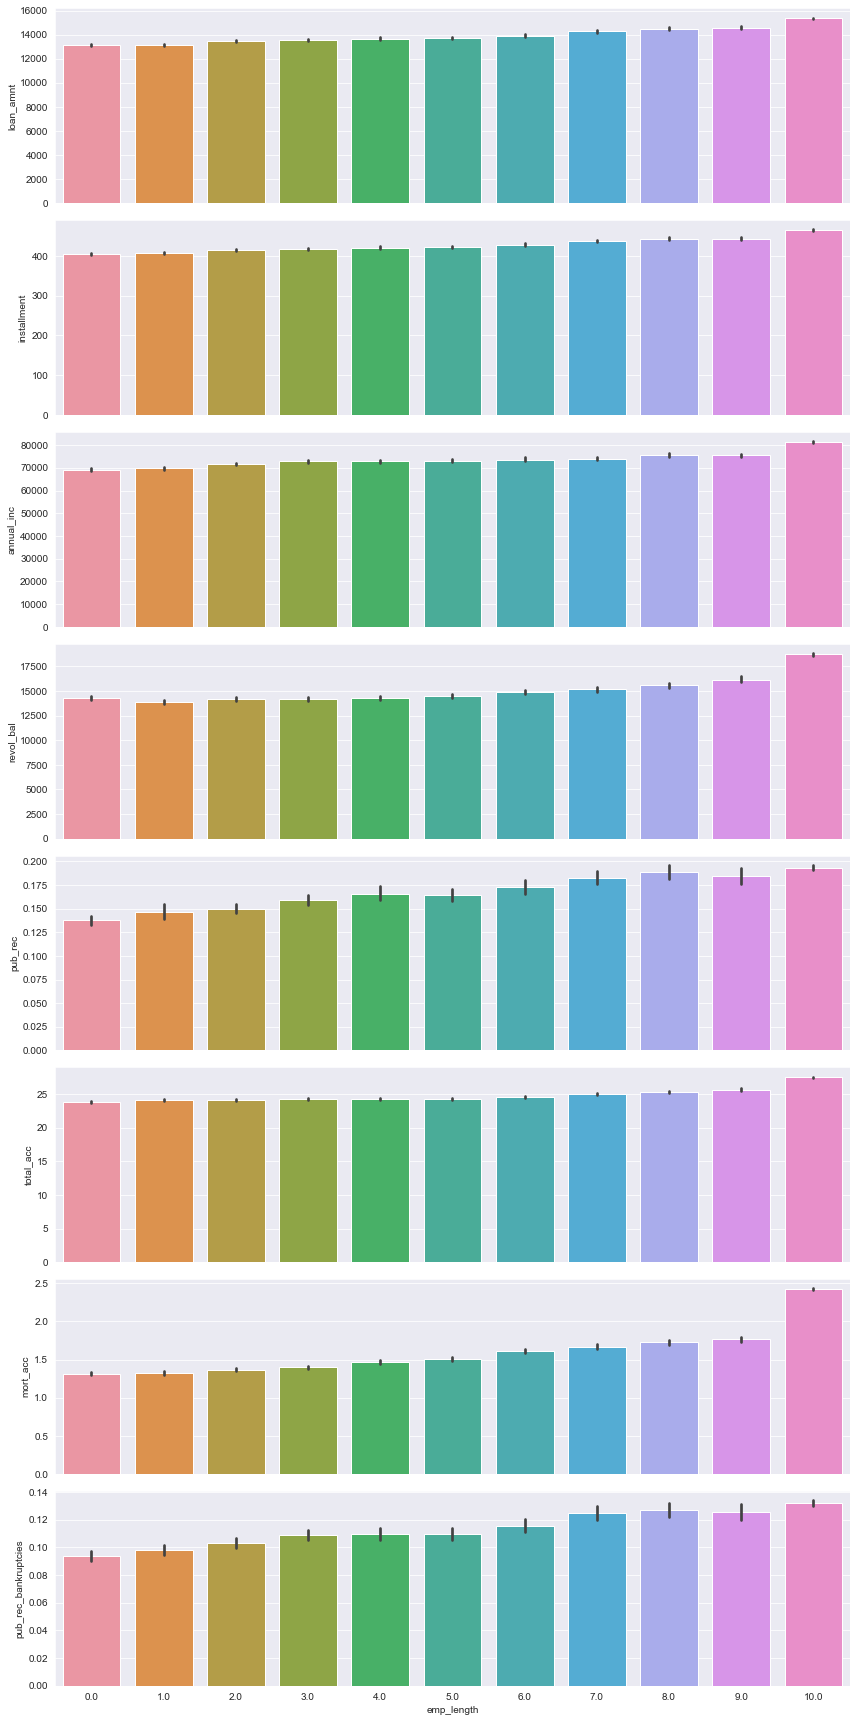

In [37]:
features = ['loan_amnt', 'installment','annual_inc','revol_bal',
            'pub_rec','total_acc','mort_acc','pub_rec_bankruptcies']
rows = len(features)
count = 1

plt.figure(figsize=(12,rows*3))

for i in features:
    plt.subplot(rows,1,count)
    if count != rows:
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        sns.barplot(x=df['emp_length'], y=df[i]).set(xlabel=None)
    else:
        sns.barplot(x=df['emp_length'], y=df[i])
    count += 1

plt.tight_layout()
plt.show()

Based on the graphs above, we will create a conditional statement to make a threshold to be 10 years or more, and the condition is <b> if all the values that are used to make the graphs above are equal to or above the threshold for all of them, then it is for sure 10 years or more, and if the most strict values are above the threshold, then we will also consider it to be 10 years or more, otherwise, it's less than 10 years </b>.

In [38]:
""" This here will help us to impute the data into 10 years (means 10
years or more and) and 0 (which means less than 10 years). Notice that,
we are not filling for all categories, we are trying to impute values that
will help us when we convert the data into two groups.
"""

# Fill the missing data based on the conclusion above
for i in df[(df['emp_length'].isnull())&((df['revol_bal']>744190.0)|(df['pub_rec_bankruptcies']>5.0))].index:
    df['emp_length'][i] = 10
    
for i in df[(df['emp_length'].isnull())&(df['mort_acc'] > 18)].index:
    df['emp_length'][i] = 10

for i in df[(df['emp_length'].isnull())&((df['total_acc']>117.0)|(df['annual_inc']>4900000.0))].index:
    df['emp_length'][i] = 10
    
for i in df[(df['emp_length'].isnull())&((df['total_acc']>117.0)|(df['annual_inc']>4900000.0))].index:
    df['emp_length'][i] = 10

# Get the number of 60% of the remaining null data
ca = len(df[(df['emp_length'].isnull())&(df['home_ownership_code']==1)]['emp_length'])*0.60

# Impute these 60% as 10.0
for i in df[(df['emp_length'].isnull())&(df['home_ownership_code']==1)][:int(ca)].index:
    df['emp_length'][i] = 10
            
# Impute the rest of the data as 0
for i in df[df['emp_length'].isnull()].index:
    df['emp_length'][i] = 0

In [39]:
# The following fucntion will group the data
def emp_length_grouping(data):
    # List of groups we will have
    el = ['10 years and more', 'less than 10 years']
    
    # Group the data
    data['emp_length'].replace([10], '10 years and more', inplace=True)
    data['emp_length'].replace([0,1,2,3,4,5,6,7,8,9], 'less than 10 years', inplace=True)
    
    return data

In [40]:
# This function will map the data
def emp_length_eng(data):
    # Prepare the data
    emp_length_dict = {'less than 10 years':0, '10 years and more':1}
    emp_length_grouping(data)
    
    # Start the mapping
    data['emp_length_code'] = data.emp_length.map(emp_length_dict).astype('int')
    
    return data

In [41]:
emp_length_eng(df);

# Employment Title Engineering

In [42]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [43]:
# First thing to do is to change the titles to lowercase
df['emp_title']  = df.emp_title.str.lower()

In [44]:
df['emp_title'].value_counts(sort=True).head(20)

manager               5637
teacher               5430
registered nurse      2627
supervisor            2591
sales                 2382
driver                2306
owner                 2201
rn                    2074
project manager       1776
office manager        1638
general manager       1461
truck driver          1288
director              1192
engineer              1188
police officer        1041
vice president         962
sales manager          961
operations manager     961
store manager          941
president              877
Name: emp_title, dtype: int64

In [45]:
emti = df['emp_title'].value_counts(sort=True)

In [46]:
# This cell creates a new data frame of the highiest frequency emp_title
s = 0
emti_str = []
emti_count = []
for i in emti.iteritems():
    if i[1] > 50:
        s += 1
        emti_str.append(i[0])
        emti_count.append(i[1])
        
emti_df = pd.DataFrame(data={'job_title':emti_str, 'job_counts':emti_count})

In [47]:
# Fill the missing data with a job title and call it unknown
df['emp_title'].fillna('unknown', inplace=True)
# Define a dictionay that condtain the job titles you will use
jobs_codes_dict = {'common':0,'others':1, 'unknown':2}

# Create a fucntion that groups the jobs titles together then create a new feature
def emp_title_eng(data, common_jobs_list):
    data['emp_title'].replace(common_jobs_list, 'common', inplace=True)
    data['emp_title'][~data.emp_title.isin(jobs_codes_dict)] = 'others'
    
    # Create a new feature
    data['emp_title_code'] = data.emp_title.map(jobs_codes_dict).astype('int')
    
    return data

In [48]:
emp_title_eng(df, emti_str);

In [49]:
df['emp_title'].value_counts()

others     251355
common     121748
unknown     22927
Name: emp_title, dtype: int64

In [50]:
df['emp_title_code'].value_counts()

1    251355
0    121748
2     22927
Name: emp_title_code, dtype: int64

<AxesSubplot:xlabel='emp_title', ylabel='count'>

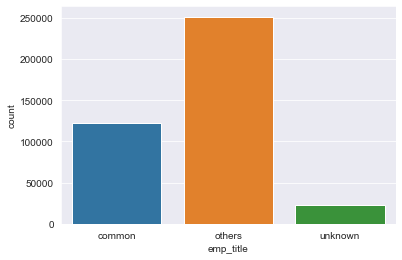

In [51]:
sns.countplot(x=df.emp_title)

# Title Engineering
It is better to drop this feature as it is the same as the **purpose**. n.b. I tried to engineer it and then I realise is the same as **purpose**.

In [52]:
feat_info('title')

The loan title provided by the borrower


In [53]:
df.drop('title', axis=1, inplace=True)

In [54]:
df.head(5)

loan_amnt        term  int_rate  installment grade sub_grade emp_title  \
0    10000.0   36 months     11.44       329.48     B        B4    common   
1     8000.0   36 months     11.99       265.68     B        B5    others   
2    15600.0   36 months     10.49       506.97     B        B3    others   
3     7200.0   36 months      6.49       220.65     A        A2    others   
4    24375.0   60 months     17.27       609.33     C        C5    others   

           emp_length home_ownership  annual_inc verification_status  \
0   10 years and more           Rent    117000.0        Not Verified   
1  less than 10 years            Own     65000.0        Not Verified   
2  less than 10 years           Rent     43057.0     Source Verified   
3  less than 10 years           Rent     54000.0        Not Verified   
4  less than 10 years            Own     55000.0            Verified   

    issue_d             purpose    dti earliest_cr_line  open_acc  pub_rec  \
0  Jan-2015              others  26.24         Jun-1990      16.0      0.0   
1  Jan-2015  debt_consolidation  22.05         Jul-2004      17.0      0.0   
2  Jan-2015         credit_card  12.79         Aug-2007      13.0      0.0   
3  Nov-2014         credit_card   2.60         Sep-2006       6.0      0.0   
4  Apr-2013         credit_card  33.95         Mar-1999      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                           address  fully_paid  \
0     0174 Michelle Gateway\nMendozaberg, OK 22690           1   
1  1076 Carney Fort Apt. 347\nLoganmouth, SD 05113           1   
2  87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113           1   
3            823 Reid Ford\nDelacruzside, MA 00813           1   
4             679 Luna Roads\nGreggshire, VA 11650           0   

   home_ownership_code  purpose_code  initial_list_status_code  \
0                    0             2                         1   
1                    1             0                         0   
2                    0             1                         0   
3                    0             1                         0   
4                    1             1                         0   

  earliest_cr_line_  month  year  emp_length_code  emp_title_code  
0        1990-06-01      6  1990                1               0  
1        2004-07-01      7  2004                0               1  
2        2007-08-01      8  2007                0               1  
3        2006-09-01      9  2006                0               1  
4        1999-03-01      3  1999                0               1

## Revolving Line Utilization Rate Engineering

In [55]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [56]:
df['revol_util'].value_counts()

0.00      2213
53.00      752
60.00      739
61.00      734
55.00      730
          ... 
892.30       1
110.10       1
123.00       1
49.63        1
128.10       1
Name: revol_util, Length: 1226, dtype: int64

In [57]:
df['revol_util'].isnull().sum()

276

Since there are not many missing points, we can drop them.

In [58]:
df.dropna(subset=['revol_util'], inplace=True)

## Number of Mortgage Accounts Engineering

In [59]:
feat_info('mort_acc')

Number of mortgage accounts.


In [60]:
df['mort_acc'].value_counts()

0.0     139708
1.0      60384
2.0      49907
3.0      38022
4.0      27865
5.0      18182
6.0      11059
7.0       6050
8.0       3120
9.0       1653
10.0       863
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

Since there are 34 possible values we can group them into ranges; 0-10, 10-20, 20-30, and 30-40.

In [61]:
# Groupe the feature points
def mort_acc_grouping(data):
    # Define a dictionary of the data groups that you will use.
    mort_acc_dict = {'0-10':0, '11-20':1, '21-34':2}
    
    # Change the data in column mort_acc
    data['mort_acc'].replace([x for x in range(0,11)], '0-10', inplace=True)
    data['mort_acc'].replace([x for x in range(11,21)], '11-20', inplace=True)
    data['mort_acc'].replace([x for x in range(21,35)], '21-34', inplace=True)

    # Since most data points are in the range 0-10, we will fill the missing data with it
    data['mort_acc'].fillna('0-10', inplace=True)
    return data

# Engineering this feature
def mort_acc_eng(data):
    mort_acc_dict = {'0-10':0, '11-20':1, '21-34':2}
    data['mort_acc_code'] = data.mort_acc.map(mort_acc_dict)
    return data

In [62]:
mort_acc_grouping(df);
mort_acc_eng(df);

In [63]:
df.mort_acc.isnull().sum()

0

In [64]:
df.mort_acc.value_counts()

0-10     394553
11-20      1162
21-34        39
Name: mort_acc, dtype: int64

In [65]:
df.mort_acc_code.value_counts()

0    394553
1      1162
2        39
Name: mort_acc_code, dtype: int64

## Number of Public Record Bankruptcies Engineering

In [66]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


In [67]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350108
1.0     42786
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [68]:
def pub_rec_bankruptcies_eng(data):
    # Start bt droping the missing data points
    data.dropna(subset=['pub_rec_bankruptcies'], inplace=True)
    
    # Group the data into 'has bankruptcy' and 'clear'
    data.pub_rec_bankruptcies.replace([0.0], 'clear', inplace=True)
    data.pub_rec_bankruptcies[~data.pub_rec_bankruptcies.isin(['clear'])] = 'has_bankruptcy'
    
    # Create a dict with possible group and map it to a new column
    pub_rec_bankruptcies_dict = {'clear':0, 'has_bankruptcy':1}
    data['pub_rec_bankruptcies_code'] = data.pub_rec_bankruptcies.map(pub_rec_bankruptcies_dict)
    
    return data

In [69]:
pub_rec_bankruptcies_eng(df);

In [70]:
df['pub_rec_bankruptcies_code'].value_counts()

0    350108
1     45111
Name: pub_rec_bankruptcies_code, dtype: int64

In [71]:
df['pub_rec_bankruptcies'].value_counts()

clear             350108
has_bankruptcy     45111
Name: pub_rec_bankruptcies, dtype: int64

In [72]:
df['pub_rec_bankruptcies'].isnull().sum()

0

## Term Engineering

In [73]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [74]:
df['term'].value_counts().index[1]

' 60 months'

In [75]:
def term_eng(data):
    data['term'].replace(['36 months'], '0', inplace=True)
    data['term'].replace(['60 months'], '1', inplace=True)
    
    return data

In [76]:
term_eng(df);

## Grade Engineering

In [77]:
feat_info('grade')

LC assigned loan grade


In [78]:
df.grade.value_counts()

B    115812
C    105775
A     64056
D     63364
E     31427
F     11740
G      3045
Name: grade, dtype: int64

In [79]:
def grade_eng(data):
    # Create a dictionary to map the data
    grade_dict = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
    
    # Map the data
    data['grade_code'] = data.grade.map(grade_dict)
    
    return data

In [80]:
grade_eng(df);

## Sub Grade Engineering

In [81]:
feat_info('sub_grade')

LC assigned loan subgrade


In [82]:
for i, j in zip(range(0,5), range(10,15)):
    print(i,j)

0 10
1 11
2 12
3 13
4 14


In [83]:
range(5)

range(0, 5)

In [84]:
df.sub_grade.value_counts()

B3    26611
B4    25558
C1    23609
C2    22541
B2    22457
B5    22046
C3    21178
C4    20232
B1    19140
A5    18500
C5    18215
D1    15947
A4    15763
D2    13916
D3    12196
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7906
E2     7410
E3     6196
E4     5354
E5     4561
F1     3530
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: sub_grade, dtype: int64

In [85]:
def sub_grade_eng(data):
    
    # Construct a dictionary to map the data
    sub_grade_dict = {}
    
    for i, j in zip(data.sub_grade.value_counts().index, range(len(data.sub_grade.value_counts().index))):
        sub_grade_dict[i] = j
    
    # Map the data
    data['sub_grade_code'] = data['sub_grade'].map(sub_grade_dict)
    
    return data
        

In [86]:
sub_grade_eng(df);

## Verification Status Engineering

In [87]:
feat_info('verification_status')

Indicates if income was verified by LC, not verified, or if the income source was verified


In [88]:
df.verification_status.value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [89]:
def verification_status_eng(data):
    verification_status_dict = {'Verified':0, 'Source Verified':1, 'Not Verified':2}
    
    data['verification_status_code'] = data.verification_status.map(verification_status_dict)
    
    return data

In [90]:
verification_status_eng(df);

## Issue Date Engineering

In [91]:
feat_info('issue_d')

The month which the loan was funded


In [92]:
df.issue_d.value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Oct-2007        1
Nov-2007        1
Aug-2007        1
Name: issue_d, Length: 112, dtype: int64

In [93]:
def issue_d_eng(data):
    # convert issue_d to datatime formate
    data['issue_d_'] = pd.to_datetime(data['issue_d'])
    
    # Create new features realted to the month and year of each fund
    data['issue_month'] = data['issue_d_'].dt.month
    data['issue_year'] = data['issue_d_'].dt.year    
    
    return data

In [94]:
issue_d_eng(df);

## Application Type Engineering

In [95]:
feat_info('application_type')

Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [96]:
df.application_type.value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [97]:
def application_type_eng(data):
    application_type_dict = {'INDIVIDUAL':0, 'JOINT':1, 'DIRECT_PAY':2}
    
    data['application_type_code'] = data.application_type.map(application_type_dict)
    
    return data

In [98]:
application_type_eng(df);

In [99]:
features = df.drop(labels='fully_paid', axis=1)
label = df['fully_paid']

In [100]:
df.corr()

loan_amnt  int_rate  installment  annual_inc  \
loan_amnt                   1.000000  0.168599     0.953872    0.337364   
int_rate                    0.168599  1.000000     0.162442   -0.057035   
installment                 0.953872  0.162442     1.000000    0.330855   
annual_inc                  0.337364 -0.057035     0.330855    1.000000   
dti                         0.016338  0.078758     0.015511   -0.081730   
open_acc                    0.198347  0.011753     0.188815    0.136620   
pub_rec                    -0.078143  0.060857    -0.068220   -0.013718   
revol_bal                   0.328515 -0.011290     0.316664    0.299758   
revol_util                  0.099581  0.293195     0.123635    0.027920   
total_acc                   0.223695 -0.036749     0.202255    0.193395   
fully_paid                 -0.059731 -0.247826    -0.040936    0.053545   
home_ownership_code         0.174550 -0.073020     0.146833    0.144943   
purpose_code               -0.147008 -0.023169    -0.143584    0.031016   
initial_list_status_code    0.077159 -0.056867     0.040169    0.041760   
month                      -0.010504 -0.002642    -0.010631   -0.014696   
year                       -0.147380  0.108216    -0.132187   -0.140571   
emp_length_code             0.091614  0.001201     0.080559    0.064929   
emp_title_code             -0.076586 -0.003335    -0.064147   -0.067172   
mort_acc_code               0.029539  0.000745     0.029656    0.053092   
pub_rec_bankruptcies_code  -0.111122  0.057681    -0.103125   -0.053294   
grade_code                  0.175197  0.952807     0.157230   -0.046039   
sub_grade_code              0.164982  0.484950     0.143754    0.025432   
verification_status_code   -0.310290 -0.235614    -0.296486   -0.081221   
issue_month                -0.020645 -0.002462    -0.023520   -0.004920   
issue_year                  0.113299  0.047372     0.101904    0.050224   
application_type_code       0.008085  0.037596     0.009832   -0.010876   

                                dti  open_acc   pub_rec  revol_bal  \
loan_amnt                  0.016338  0.198347 -0.078143   0.328515   
int_rate                   0.078758  0.011753  0.060857  -0.011290   
installment                0.015511  0.188815 -0.068220   0.316664   
annual_inc                -0.081730  0.136620 -0.013718   0.299758   
dti                        1.000000  0.135907 -0.017820   0.063461   
open_acc                   0.135907  1.000000 -0.018799   0.221053   
pub_rec                   -0.017820 -0.018799  1.000000  -0.101883   
revol_bal                  0.063461  0.221053 -0.101883   1.000000   
revol_util                 0.088023 -0.131821 -0.076257   0.226305   
total_acc                  0.101772  0.680745  0.019481   0.191474   
fully_paid                -0.062390 -0.028134 -0.019900   0.010793   
home_ownership_code        0.003435  0.127798 -0.000755   0.158592   
purpose_code              -0.064396 -0.083421  0.002246  -0.039725   
initial_list_status_code   0.022374  0.071530  0.045646   0.028322   
month                      0.002594  0.005585 -0.003946  -0.012138   
year                      -0.009683 -0.123873 -0.053471  -0.199313   
emp_length_code            0.013014  0.042792  0.026420   0.093532   
emp_title_code            -0.009211 -0.076118 -0.018600  -0.026680   
mort_acc_code             -0.010013  0.016963  0.011789   0.034977   
pub_rec_bankruptcies_code -0.014185 -0.028928  0.664631  -0.129082   
grade_code                 0.078069  0.019770  0.068866  -0.008591   
sub_grade_code             0.022770  0.035715 -0.008377   0.013978   
verification_status_code  -0.049972 -0.065179 -0.042714  -0.109175   
issue_month               -0.000213 -0.009366 -0.023702  -0.002423   
issue_year                 0.073585  0.137029  0.128482   0.034112   
application_type_code      0.068539  0.015955  0.001896   0.007881   

                           revol_util  total_acc  fully_paid  \
loan_amnt                    0.099581   0.2236

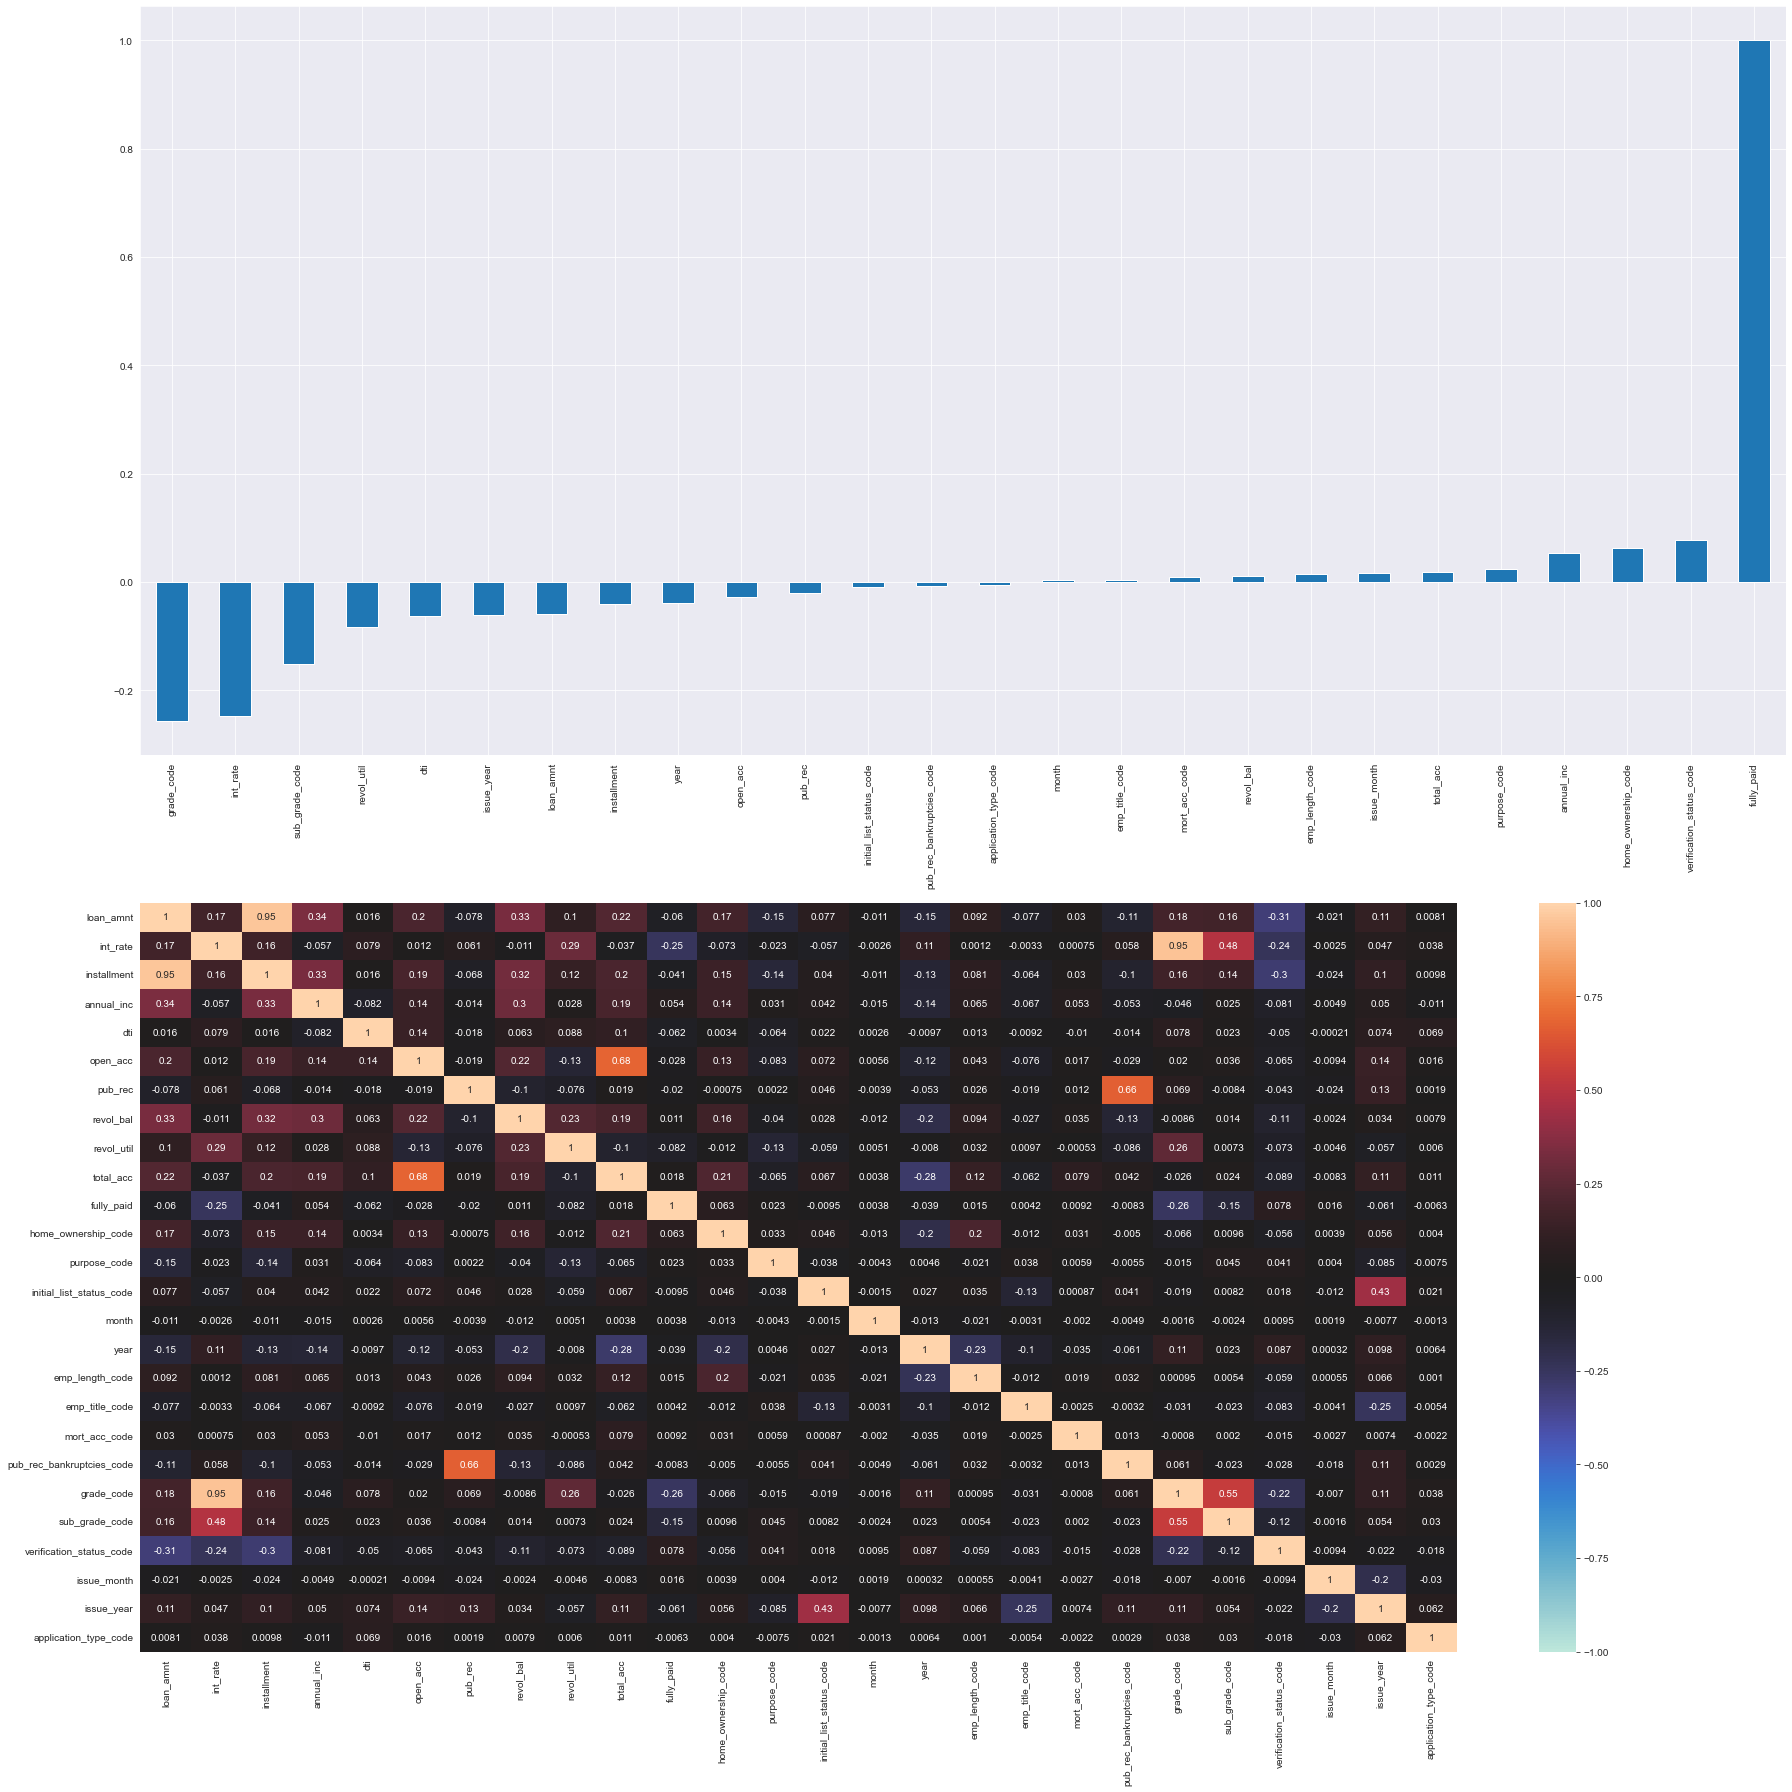

In [101]:
plt.figure(figsize=(25,25))
plt.subplot(212)
sns.heatmap(data=df.corr(), annot=True, cmap='icefire', vmin=-1, vmax=1)
plt.subplot(211)
df.corr()['fully_paid'][:].sort_values().plot(kind='bar')
plt.tight_layout()
plt.show()

## Ideas #2: Loan Amount
<ol>
    <li> The <b>int_rate</b> feature; which is the interest rate on the loan, seems to have no greate realtion with the loan amount, as the points are scattered randomly. I think these two featers need to be investidated more as this doesn't sound right to me. </li>
    <li> We can see high correlataion between the <b>loan_amnt</b> and the <b>installment</b>, and there is, roughly speaking, a linear relationship between them.</li>
    <li> There isn't a high correlation between the loan amount and <b>fully_paid</b>. </li>
    
</ol>

## Idea #3: Interst Rate
<ol>
    <li> <b>int_rate</b> is most realted to the label in this data and <b>revol_util</b>.</li>
    <li> It looks like there is an extreme point that we need to get rid of in the graph of <b>revol_util</b> vs. <b>int_rate</b>. </li>

</ol>

## Idea #4: open_acc
<ol>
    <li> It has high correlation with <b>open_acc</b> </li>
    
</ol>

## Idea #5: pub_rec
<ol>
    <li> It has high correlation with <b>pub_rec_bankruptcies</b> </li>
    
</ol>

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

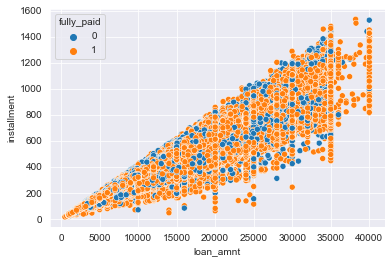

In [102]:
sns.scatterplot(data=df, x='loan_amnt', y='installment', hue='fully_paid')

In [103]:
1 - len(df[df['loan_amnt']<35000])/len(df)

0.037508318172962296

In [104]:
shorter_df = df[df['loan_amnt']<35000]

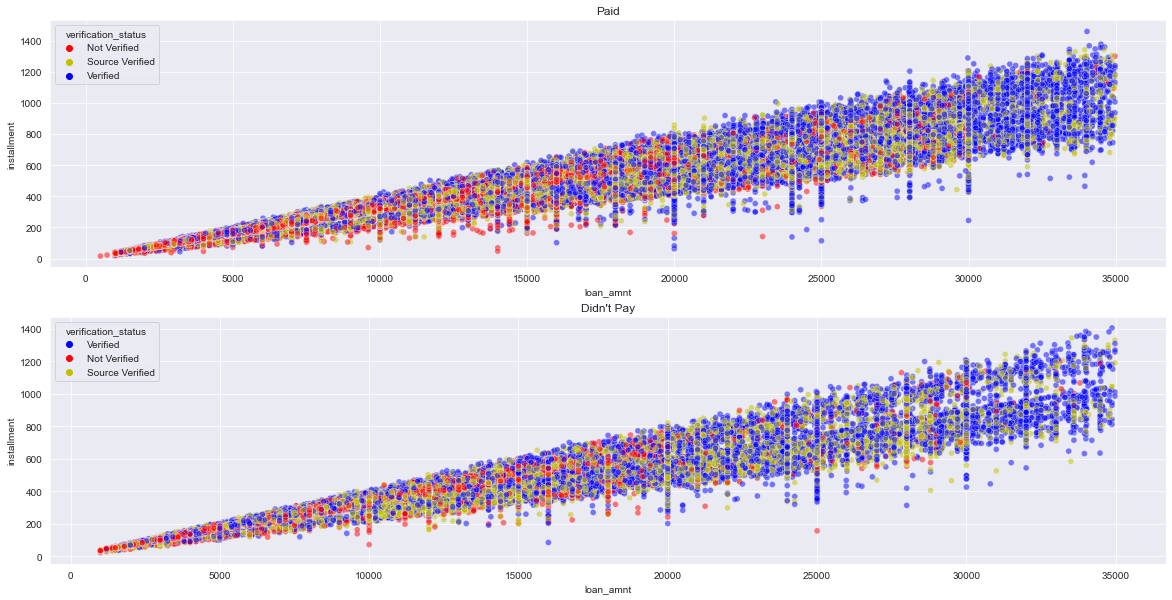

In [105]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.title('Paid')
sns.scatterplot(data=shorter_df[shorter_df['fully_paid']==1], x='loan_amnt', y='installment',
                hue='verification_status', alpha=0.5, palette={'Not Verified':'r','Source Verified':'y','Verified':'b'})

plt.subplot(212)
plt.title("Didn't Pay")
sns.scatterplot(data=shorter_df[shorter_df['fully_paid']==0], x='loan_amnt', y='installment',
               hue='verification_status', alpha=0.5, palette={'Not Verified':'r','Source Verified':'y','Verified':'b'})

plt.show()

In [106]:
feat_info('verification_status')

Indicates if income was verified by LC, not verified, or if the income source was verified


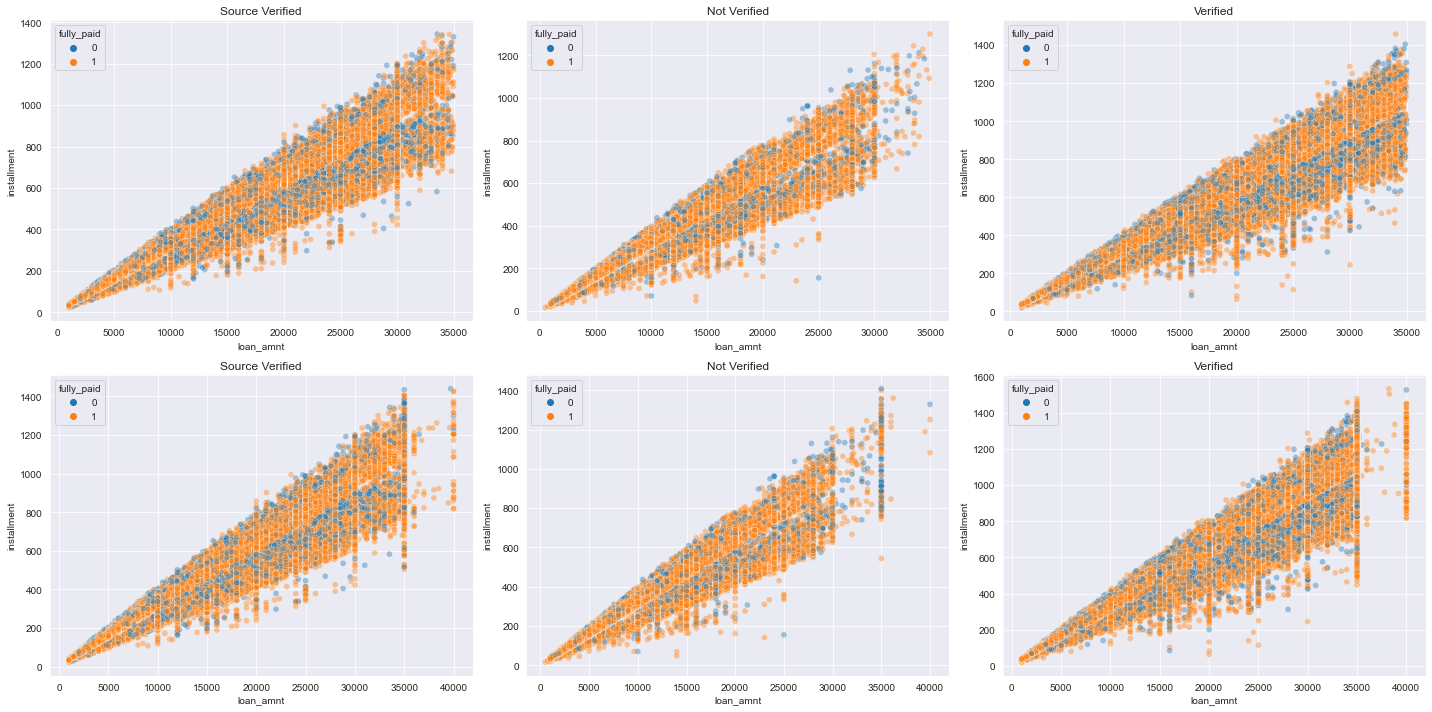

Shorter
Soruce Verified = 126760,  Not Verified = 124229,  Verified = 129406
Original
Soruce Verified = 131301,  Not Verified = 124467,  Verified = 139451


In [107]:
plt.figure(figsize=(20,10))

plt.subplot(231)
plt.title('Source Verified')
sns.scatterplot(data=shorter_df[shorter_df['verification_status']=='Source Verified'], x='loan_amnt', y='installment',
               hue='fully_paid', alpha=0.4)

plt.subplot(232)
plt.title('Not Verified')
sns.scatterplot(data=shorter_df[shorter_df['verification_status']=='Not Verified'], x='loan_amnt', y='installment',
               hue='fully_paid', alpha=0.4)

plt.subplot(233)
plt.title('Verified')
sns.scatterplot(data=shorter_df[shorter_df['verification_status']=='Verified'], x='loan_amnt', y='installment',
               hue='fully_paid', alpha=0.4)

##############################################################
plt.subplot(234)
plt.title('Source Verified')
sns.scatterplot(data=df[df['verification_status']=='Source Verified'], x='loan_amnt', y='installment',
               hue='fully_paid', alpha=0.4)

plt.subplot(235)
plt.title('Not Verified')
sns.scatterplot(data=df[df['verification_status']=='Not Verified'], x='loan_amnt', y='installment',
               hue='fully_paid', alpha=0.4)

plt.subplot(236)
plt.title('Verified')
sns.scatterplot(data=df[df['verification_status']=='Verified'], x='loan_amnt', y='installment',
               hue='fully_paid', alpha=0.4)


plt.tight_layout()
plt.show()
print('Shorter')
print(f"Soruce Verified = {len(shorter_df[shorter_df['verification_status']=='Source Verified'])}, ",
      f"Not Verified = {len(shorter_df[shorter_df['verification_status']=='Not Verified'])}, ",
      f"Verified = {len(shorter_df[shorter_df['verification_status']=='Verified'])}")
print('Original')
print(f"Soruce Verified = {len(df[df['verification_status']=='Source Verified'])}, ",
      f"Not Verified = {len(df[df['verification_status']=='Not Verified'])}, ",
      f"Verified = {len(df[df['verification_status']=='Verified'])}")

## Idea #6: Shoter data
It looks like shortining the data based on the loan amount is not the best option as we will miss a lot of data. However, it might be a good idea to compare the performace of the NN for both data sets.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   loan_amnt                  395219 non-null  float64       
 1   term                       395219 non-null  object        
 2   int_rate                   395219 non-null  float64       
 3   installment                395219 non-null  float64       
 4   grade                      395219 non-null  object        
 5   sub_grade                  395219 non-null  object        
 6   emp_title                  395219 non-null  object        
 7   emp_length                 395219 non-null  object        
 8   home_ownership             395219 non-null  object        
 9   annual_inc                 395219 non-null  float64       
 10  verification_status        395219 non-null  object        
 11  issue_d                    395219 non-null  object  

In [109]:
feat_info('annual_inc')

The self-reported annual income provided by the borrower during registration.


<AxesSubplot:xlabel='loan_amnt', ylabel='annual_inc'>

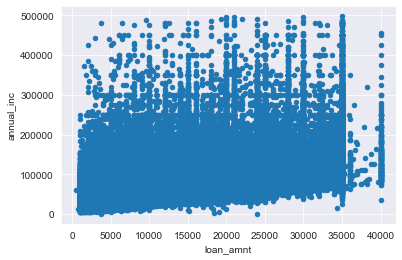

In [110]:
df[df['annual_inc']<500000].plot(kind='scatter', x='loan_amnt', y='annual_inc')

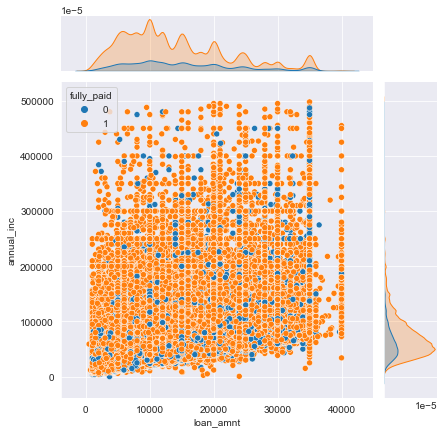

In [111]:
sns.jointplot(data=df[df['annual_inc']<500000], x='loan_amnt', y='annual_inc',
             hue='fully_paid')

In [112]:
len(df[df['annual_inc']<500000])/len(df)

0.9987703020350742

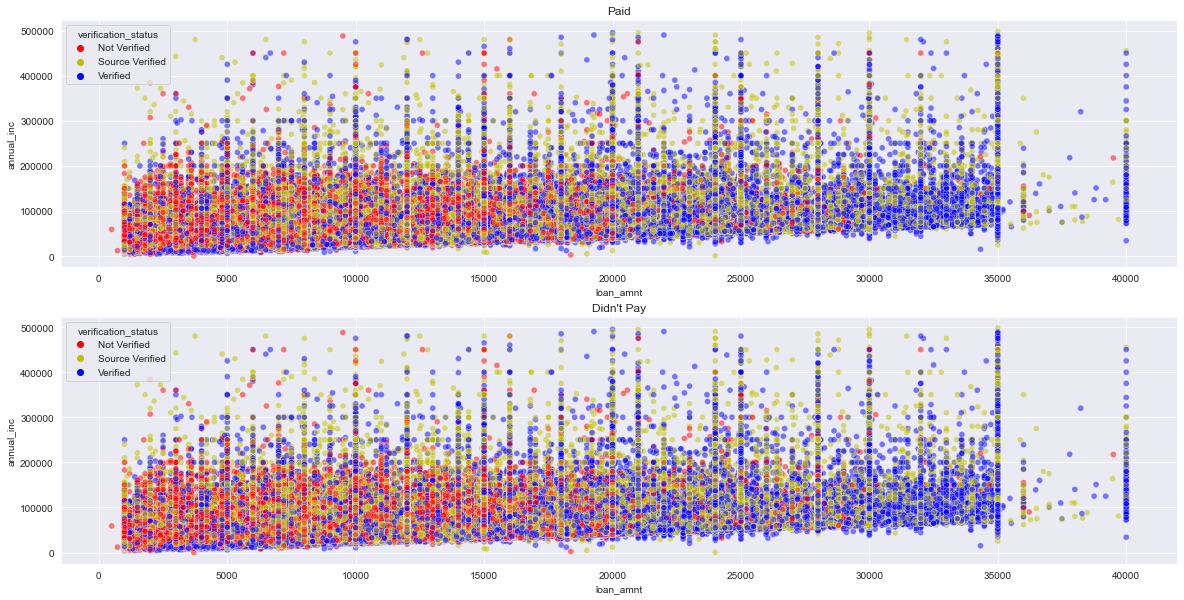

In [113]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.title('Paid')
sns.scatterplot(data=df[df['annual_inc']<500000], x='loan_amnt', y='annual_inc',
                hue='verification_status', alpha=0.5, palette={'Not Verified':'r','Source Verified':'y','Verified':'b'})

plt.subplot(212)
plt.title("Didn't Pay")
sns.scatterplot(data=df[df['annual_inc']<500000], x='loan_amnt', y='annual_inc',
               hue='verification_status', alpha=0.5, palette={'Not Verified':'r','Source Verified':'y','Verified':'b'})

plt.show()

In [114]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   loan_amnt                  395219 non-null  float64       
 1   term                       395219 non-null  object        
 2   int_rate                   395219 non-null  float64       
 3   installment                395219 non-null  float64       
 4   grade                      395219 non-null  object        
 5   sub_grade                  395219 non-null  object        
 6   emp_title                  395219 non-null  object        
 7   emp_length                 395219 non-null  object        
 8   home_ownership             395219 non-null  object        
 9   annual_inc                 395219 non-null  float64       
 10  verification_status        395219 non-null  object        
 11  issue_d                    395219 non-null  object  

# ANN

In [115]:
features.drop(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
               'home_ownership', 'verification_status', 'issue_d',
               'earliest_cr_line', 'initial_list_status', 'application_type',
              'mort_acc', 'pub_rec_bankruptcies', 'address', 'earliest_cr_line_', 
              'issue_d_', 'purpose'], axis=1, inplace=True)

In [116]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amnt                  395219 non-null  float64
 1   int_rate                   395219 non-null  float64
 2   installment                395219 non-null  float64
 3   annual_inc                 395219 non-null  float64
 4   dti                        395219 non-null  float64
 5   open_acc                   395219 non-null  float64
 6   pub_rec                    395219 non-null  float64
 7   revol_bal                  395219 non-null  float64
 8   revol_util                 395219 non-null  float64
 9   total_acc                  395219 non-null  float64
 10  home_ownership_code        395219 non-null  int64  
 11  purpose_code               395219 non-null  int64  
 12  initial_list_status_code   395219 non-null  int64  
 13  month                      39

In [117]:
from yellowbrick.model_selection import FeatureImportances

<AxesSubplot:>

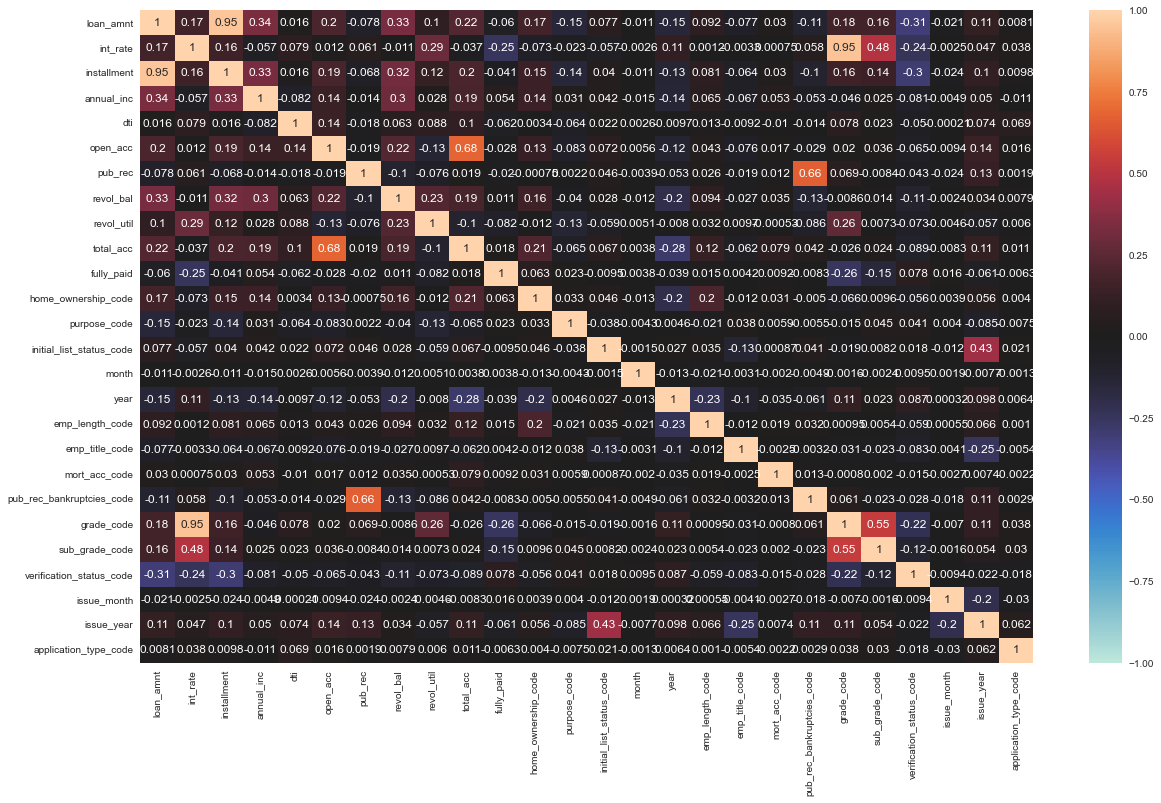

In [118]:
plt.figure(figsize=(20,12))
sns.heatmap(data=df.corr(), annot=True, cmap='icefire', vmin=-1, vmax=1)

<AxesSubplot:>

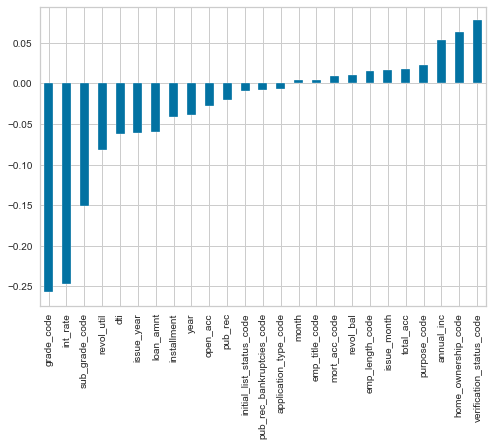

In [119]:
df.corr()['fully_paid'].sort_values()[:-1].plot(kind='bar')

### To handle the imbalance in the data, duplicate the minor class, and shuffle the data of the replica.

In [120]:
df_f = df[df['fully_paid']==0]

In [121]:
# To shuffle the data in each column
for i in df_f.columns:
    df_f[i] = np.random.permutation(df_f[i].values)

In [122]:
df_f_list = []
for i in range(3):
    df_f_list.append(df_f)

In [123]:
len(pd.concat(df_f_list, axis=0))

232569

In [124]:
len(df[df['fully_paid']==1])

317696

In [125]:
df_f_list.append(df)

In [126]:
dff = pd.concat(df_f_list, axis=0)

In [127]:
X = features.values
y = label.values

In [128]:
X = dff.copy()
X.drop(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
               'home_ownership', 'verification_status', 'issue_d',
               'earliest_cr_line', 'initial_list_status', 'application_type',
              'mort_acc', 'pub_rec_bankruptcies', 'address', 'earliest_cr_line_', 
              'issue_d_', 'purpose'], axis=1, inplace=True)
y = X.pop("fully_paid")

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score

# # Train and score baseline model
# baseline = RandomForestRegressor(criterion="mae", random_state=0)
# baseline_score = cross_val_score(
#     baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
# )
# baseline_score = -1 * baseline_score.mean()

# print(f"MAE Baseline Score: {baseline_score:.4}")

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=101)

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [132]:
X_train.shape

(502230, 25)

In [133]:
from tensorflow.keras.callbacks import TensorBoard

# Give the model a useful name
NAME = "Lending_Club_{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))


2022-02-12 18:04:37.493485: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-02-12 18:04:37.493493: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-02-12 18:04:37.494090: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [134]:
model = Sequential()

from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


model.add(Dense(units=len(X.columns), activation='relu'))
model.add(Dense(units=len(X.columns)/2, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=len(X.columns)/3, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units=len(X.columns)/4, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=X_train, y=y_train, epochs=600, batch_size=2048,
          validation_data=(X_test, y_test),
          callbacks=[early_stop, tensorboard], verbose=1)

2022-02-12 18:04:37.504800: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-12 18:04:37.505019: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


2022-02-12 18:04:37.935487: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-12 18:04:37.938825: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-12 18:04:38.110140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/600
 22/246 [=>............................] - ETA: 1s - loss: 0.6947

2022-02-12 18:04:38.451798: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-02-12 18:04:38.451810: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-02-12 18:04:38.461599: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-02-12 18:04:38.482489: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-02-12 18:04:38.513767: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/Lending_Club_1644674677/train/plugins/profile/2022_02_12_18_04_38

2022-02-12 18:04:38.514476: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/Lending_Club_1644674677/train/plugins/profile/2022_02_12_18_04_38/Nours-MBP.lan.trace.json.gz
2022-02-12 18:04:38.521806: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/Lending_Club_1644674677

246/246 [==============================] - 2s 7ms/step - loss: 0.6282 - val_loss: 0.5765
Epoch 2/600
  1/246 [..............................] - ETA: 1s - loss: 0.5886

2022-02-12 18:04:40.058683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


246/246 [==============================] - 1s 6ms/step - loss: 0.5417 - val_loss: 0.4942
Epoch 3/600
246/246 [==============================] - 1s 6ms/step - loss: 0.4564 - val_loss: 0.4192
Epoch 4/600
246/246 [==============================] - 1s 6ms/step - loss: 0.3987 - val_loss: 0.3774
Epoch 5/600
246/246 [==============================] - 1s 5ms/step - loss: 0.3699 - val_loss: 0.3578
Epoch 6/600
246/246 [==============================] - 1s 6ms/step - loss: 0.3555 - val_loss: 0.3468
Epoch 7/600
246/246 [==============================] - 1s 6ms/step - loss: 0.3475 - val_loss: 0.3424
Epoch 8/600
246/246 [==============================] - 1s 5ms/step - loss: 0.3427 - val_loss: 0.3389
Epoch 9/600
246/246 [==============================] - 1s 5ms/step - loss: 0.3394 - val_loss: 0.3344
Epoch 10/600
246/246 [==============================] - 1s 5ms/step - loss: 0.3371 - val_loss: 0.3328
Epoch 11/600
246/246 [==============================] - 1s 5ms/step - loss: 0.3350 - val_loss: 0.3311


<AxesSubplot:>

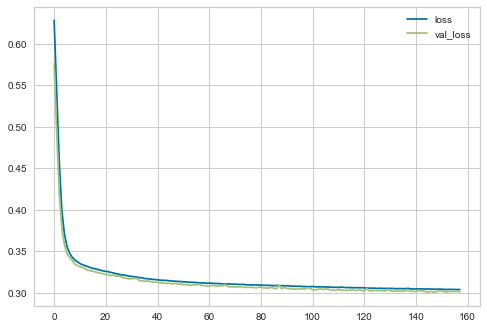

In [135]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [136]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

2022-02-12 18:08:20.765331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.96      0.76      0.85     62105
           1       0.81      0.97      0.88     63453

    accuracy                           0.87    125558
   macro avg       0.88      0.87      0.87    125558
weighted avg       0.88      0.87      0.87    125558

[[47481 14624]
 [ 2061 61392]]


In [137]:
from tensorflow.keras.models import load_model
model.save('LendingClub_NN.h5')  